In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats


In [2]:
datafile="C:/Users/hrashikesh hegde/Downloads/ToothGrowth.csv"
data=pd.read_csv(datafile)
data.shape

(60, 4)

In [3]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [4]:
pd.unique(data.supp)

array(['VC', 'OJ'], dtype=object)

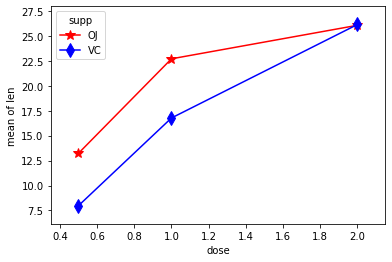

In [5]:
fig=interaction_plot(data.dose,data.supp,data.len,colors=['red','blue'],markers=['*','d'],ms=10)

In [6]:
#Degrees of freedome
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w=N-(len(data.supp.unique())*len(data.dose.unique()))
df_w

54

In [7]:
#Sum of squares
grand_mean=data['len'].mean()
ssq_a=sum([(data[data.supp==i].len.mean()-grand_mean)**2 for i in data.supp])
ssq_b=sum([(data[data.dose==i].len.mean()-grand_mean)**2 for i in data.dose])
ssq_t=sum((data.len-grand_mean)**2)
vc=data[data.supp=='VC']
oj=data[data.supp=='OJ']
vc_dose_mean=[vc[vc.dose==i].len.mean() for i in vc.dose]
oj_dose_mean=[oj[oj.dose==i].len.mean() for i in oj.dose]
ssq_w=sum((oj.len-oj_dose_mean)**2)+sum((vc.len-vc_dose_mean)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w

In [8]:
ssq_axb

108.31900000000155

In [9]:
ssq_a

205.35000000000005

In [10]:
ssq_b

2426.434333333332

In [11]:
ssq_t


3452.2093333333332

In [12]:
ssq_w

712.106

In [13]:
ssq_axb

108.31900000000155

In [14]:
#Mean of square
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w

In [15]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
faxb=ms_axb/ms_w

In [16]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w

In [17]:
ms_w

13.187148148148149

In [18]:
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

In [19]:
#